In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Enable inline plotting for matplotlib
%matplotlib inline


In [2]:
data = pd.read_csv("training_data.csv")

# Display the first few rows and descriptive statistics
print(data.head())
print(data.describe())

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618


In [3]:
# Define features and target variable
X = data.iloc[:, [0]].values
Y = data.iloc[:, 1].values

# Check for NaN values in Y and handle them
if np.isnan(Y).sum() > 0:
    print(f"Found {np.isnan(Y).sum()} NaN values in Y. Handling them by dropping corresponding rows.")
    # Removing rows where Y is NaN
    mask = ~np.isnan(Y)
    X = X[mask]
    Y = Y[mask]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


Found 1 NaN values in Y. Handling them by dropping corresponding rows.


In [4]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)


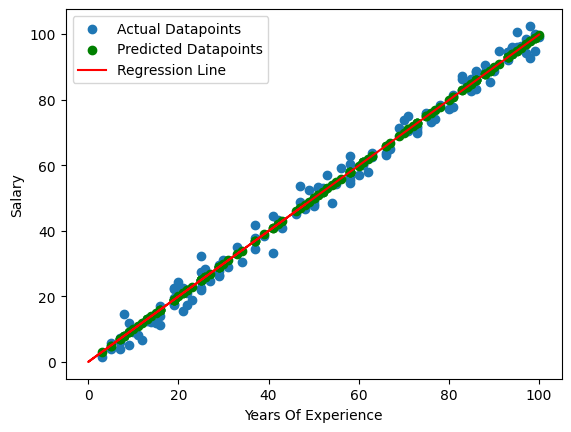

In [5]:
# Plotting the results
plt.scatter(X_test, Y_test, label='Actual Datapoints')
plt.scatter(X_test, Y_pred, label='Predicted Datapoints', c='green')
plt.plot(X_train, model.predict(X_train), label='Regression Line', color='red')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [6]:
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 score: {r2}")


Mean Squared Error: 7.551490700376486
R^2 score: 0.9916592070219102
